In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from medmnist import DermaMNIST
# Load training, validation, and test sets
train_dataset = DermaMNIST(split='train', download=True, as_rgb=True, root='./')
val_dataset = DermaMNIST(split='val', download=True, as_rgb=True, root='./')
test_dataset = DermaMNIST(split='test', download=True, as_rgb=True, root='./')

Using downloaded and verified file: ./dermamnist.npz
Using downloaded and verified file: ./dermamnist.npz
Using downloaded and verified file: ./dermamnist.npz


In [3]:
x_train, y_train = train_dataset.imgs, train_dataset.labels
x_val, y_val = val_dataset.imgs, val_dataset.labels
x_test, y_test = test_dataset.imgs, test_dataset.labels

In [4]:
import matplotlib.pyplot as plt

def plot_images(imgs, labels, num_imgs=5):
    # Set up the matplotlib figure and axes, based on the number of images.
    fig, axes = plt.subplots(1, num_imgs, figsize=(10, 2))
    for i, ax in enumerate(axes.flat):
        # Check if images are grayscale (1 channel) or RGB (3 channels)
        if imgs[i].shape[-1] == 3:
            ax.imshow(imgs[i].astype("uint8"))
        else:
            ax.imshow(imgs[i].squeeze(), cmap='gray') # Use squeeze to remove single-dimensional entries from the shape
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    plt.show()


Dataset DermaMNIST of size 28 (dermamnist)
    Number of datapoints: 2005
    Root location: ./
    Split: test
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}
    Number of samples: {'train': 7007, 'val': 1003, 'test': 2005}
    Description: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.
    License: CC BY-NC 4.0


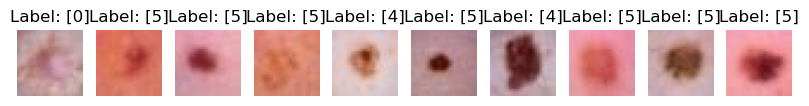

In [5]:
print(test_dataset)
plot_images(x_train, y_train, num_imgs=10)

In [6]:
# Normalize the data such that the values range between 0 and 1
print("Pixel ranges before normailzation")
print(f"Training: {x_train[0].min()} - {x_train[0].max()}")
print(f"Validation: {x_val[0].min()} - {x_val[0].max()}")
print(f"Test: {x_test[0].min()} - {x_test[0].max()}")

print("\nDimensions and data types before normalization")
print(f"Training: {x_train.shape}, {y_train.shape}, {x_train.dtype}, {y_train.dtype}")
print(f"Validation: {x_val.shape}, {y_val.shape}, {x_val.dtype}, {y_val.dtype}")
print(f"Test: {x_test.shape}, {y_test.shape}, {x_test.dtype}, {y_test.dtype}")

Pixel ranges before normailzation
Training: 93 - 227
Validation: 13 - 245
Test: 13 - 238

Dimensions and data types before normalization
Training: (7007, 28, 28, 3), (7007, 1), uint8, uint8
Validation: (1003, 28, 28, 3), (1003, 1), uint8, uint8
Test: (2005, 28, 28, 3), (2005, 1), uint8, uint8


In [7]:
# Normalization
## Convert the 8 bit integers into 32 bit floats
x_train = x_train.astype(np.float32) 
x_val = x_val.astype(np.float32)
x_test = x_test.astype(np.float32)

## Normalize the pixel values to be between 0 and 1. The conversion now works since they data is in float format
x_train /= 255.0
x_val /= 255.0
x_test /= 255.0

print("Pixel ranges AFTER normailzation")
print(f"Training: {x_train[0].min()} - {x_train[0].max()}")
print(f"Validation: {x_val[0].min()} - {x_val[0].max()}")
print(f"Test: {x_test[0].min()} - {x_test[0].max()}")

print("\nDimensions and data types AFTER normalization")
print(f"Training: {x_train.shape}, {y_train.shape}, {x_train.dtype}, {y_train.dtype}")
print(f"Validation: {x_val.shape}, {y_val.shape}, {x_val.dtype}, {y_val.dtype}")
print(f"Test: {x_test.shape}, {y_test.shape}, {x_test.dtype}, {y_test.dtype}")

Pixel ranges AFTER normailzation
Training: 0.364705890417099 - 0.8901960849761963
Validation: 0.05098039284348488 - 0.9607843160629272
Test: 0.05098039284348488 - 0.9333333373069763

Dimensions and data types AFTER normalization
Training: (7007, 28, 28, 3), (7007, 1), float32, uint8
Validation: (1003, 28, 28, 3), (1003, 1), float32, uint8
Test: (2005, 28, 28, 3), (2005, 1), float32, uint8


In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 3)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=120, activation='relu'))
model.add(tf.keras.layers.Dense(units=84, activation='relu'))
model.add(tf.keras.layers.Dense(units=7, activation = 'softmax'))

print(model.summary())

c:\Users\ammar\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           595 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,471 (173.71 KB)

 Trainable params: 44,471 (173.71 KB)

 Non-trainable params: 0 (0.00 B)

None


In [9]:
learning_rate = 0.001 # The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated.00
loss_function = 'sparse_categorical_crossentropy' # Use sparse_categorical_crossentropy when the labels are integers (for categorizing data))
batch_size = 32 # The number of samples uses to calcualte the gradient and update the weights
num_epochs = 50 # the number of times the model will cycle through the data
## Iterations per epock = number of samples / batch size = 7007 / 32 = 219
# In each epoch the movdel will tain on all 7007 but in batches of 32 to better use the memory and speed up the training process

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6686 - loss: 1.1281 - val_accuracy: 0.6690 - val_loss: 0.9475
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6685 - loss: 0.9519 - val_accuracy: 0.6790 - val_loss: 0.8990
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6765 - loss: 0.9068 - val_accuracy: 0.6859 - val_loss: 0.8712
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6792 - loss: 0.8891 - val_accuracy: 0.6909 - val_loss: 0.8505
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6900 - loss: 0.8817 - val_accuracy: 0.6949 - val_loss: 0.8442
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7000 - loss: 0.8296 - val_accuracy: 0.6919 - val_loss: 0.9150
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6938 - loss: 0.8456 - val_accuracy: 0.6939 - val_loss: 0.8133
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6933 - loss: 0.8155 - val_accuracy: 0.

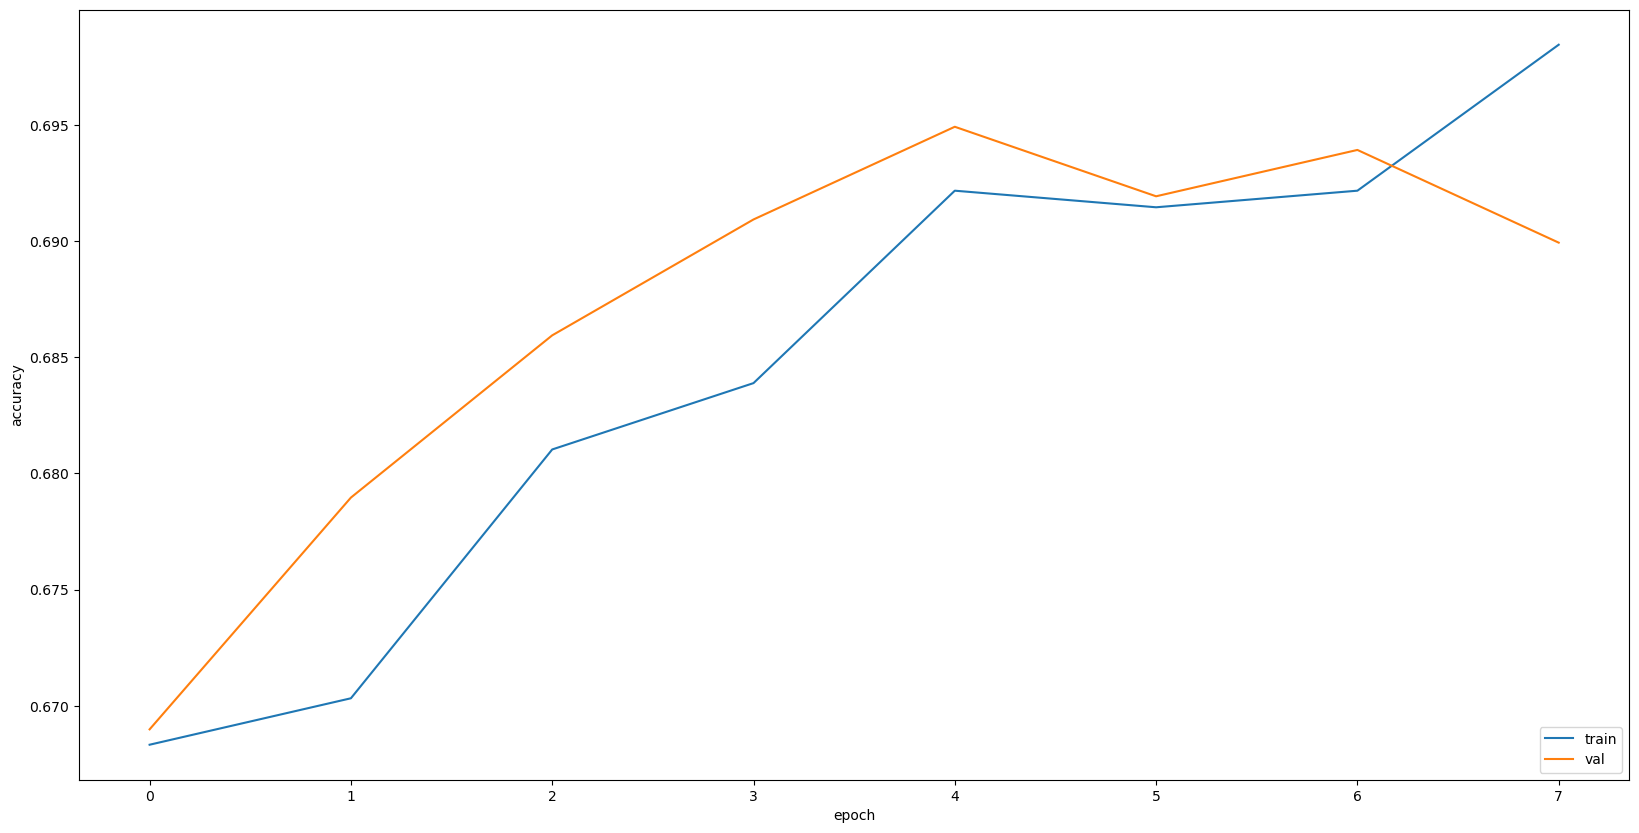

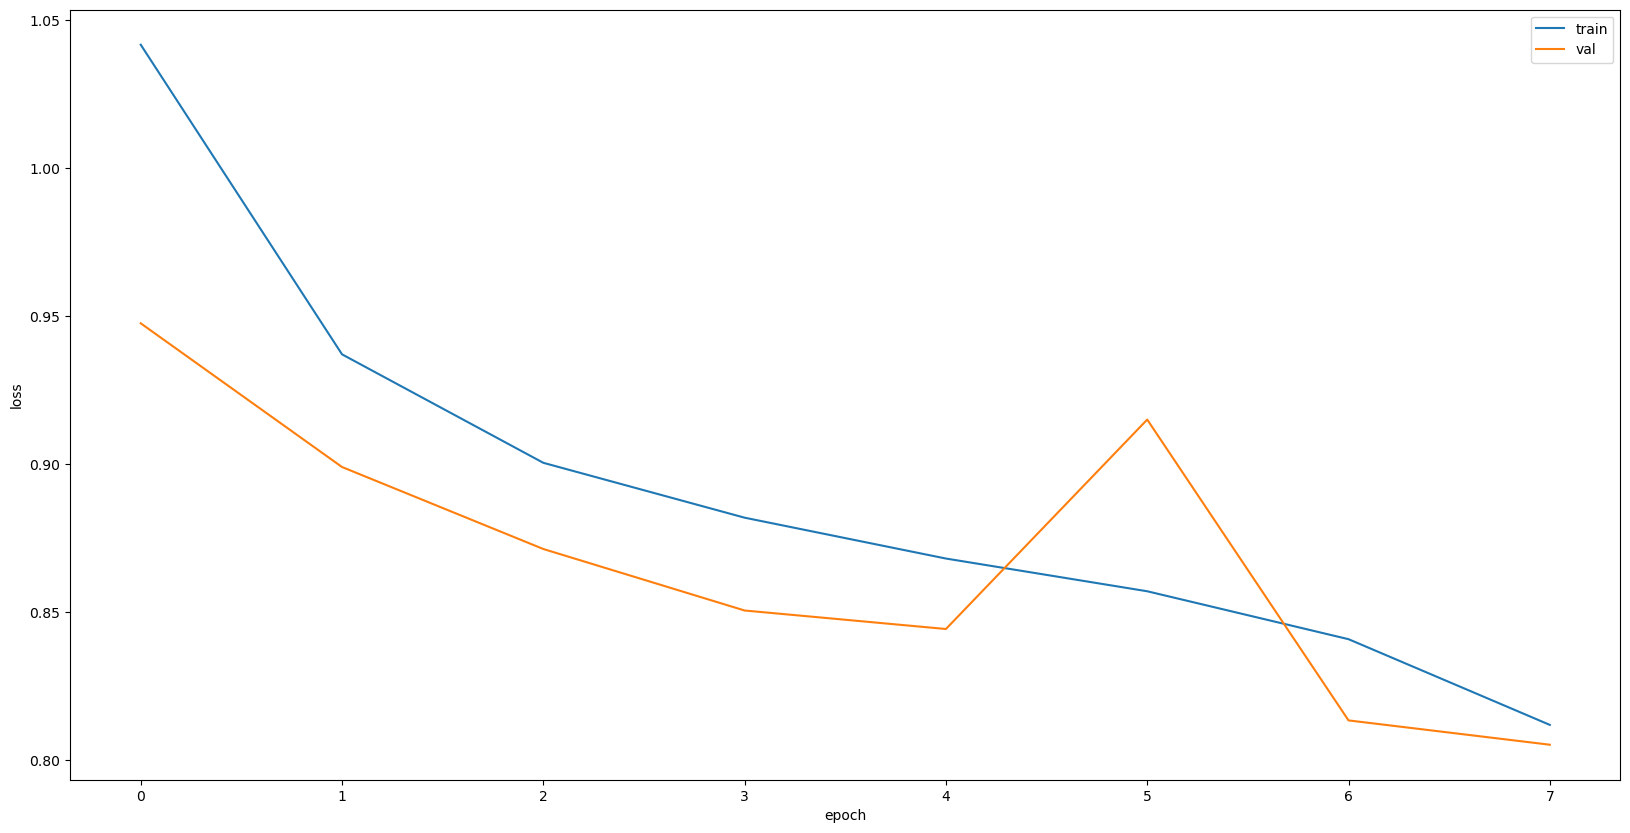

In [10]:
# training configuration
optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=3, verbose=1)
model_save = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.keras', monitor='val_accuracy', save_best_only=True)

#train
history = model.fit(x=x_train,y=y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stop,model_save])

plt.rcParams["figure.figsize"] = (20,10)

# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [11]:
# restore weights from the best training point
model.load_weights('best_model.keras')

scores = model.evaluate(x_train, y_train, verbose=0)
print('TRAINING SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

scores = model.evaluate(x_val, y_val, verbose=0)
print('\nVALIDATION SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

scores = model.evaluate(x_test, y_test, verbose=0)
print('\nTEST SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

# Training results indicate the model is overfitting, and needs to be adjusted.

TRAINING SET
Loss: 0.8462007641792297 
Accuracy: 0.6940202713012695

VALIDATION SET
Loss: 0.8442064523696899 
Accuracy: 0.694915235042572

TEST SET
Loss: 0.8552571535110474 
Accuracy: 0.6912718415260315


Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7960 - loss: 0.5549 - val_accuracy: 0.7278 - val_loss: 0.7392
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7905 - loss: 0.5633 - val_accuracy: 0.7268 - val_loss: 0.7419
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7783 - loss: 0.5842 - val_accuracy: 0.7009 - val_loss: 0.7457
Epoch 3: early stopping


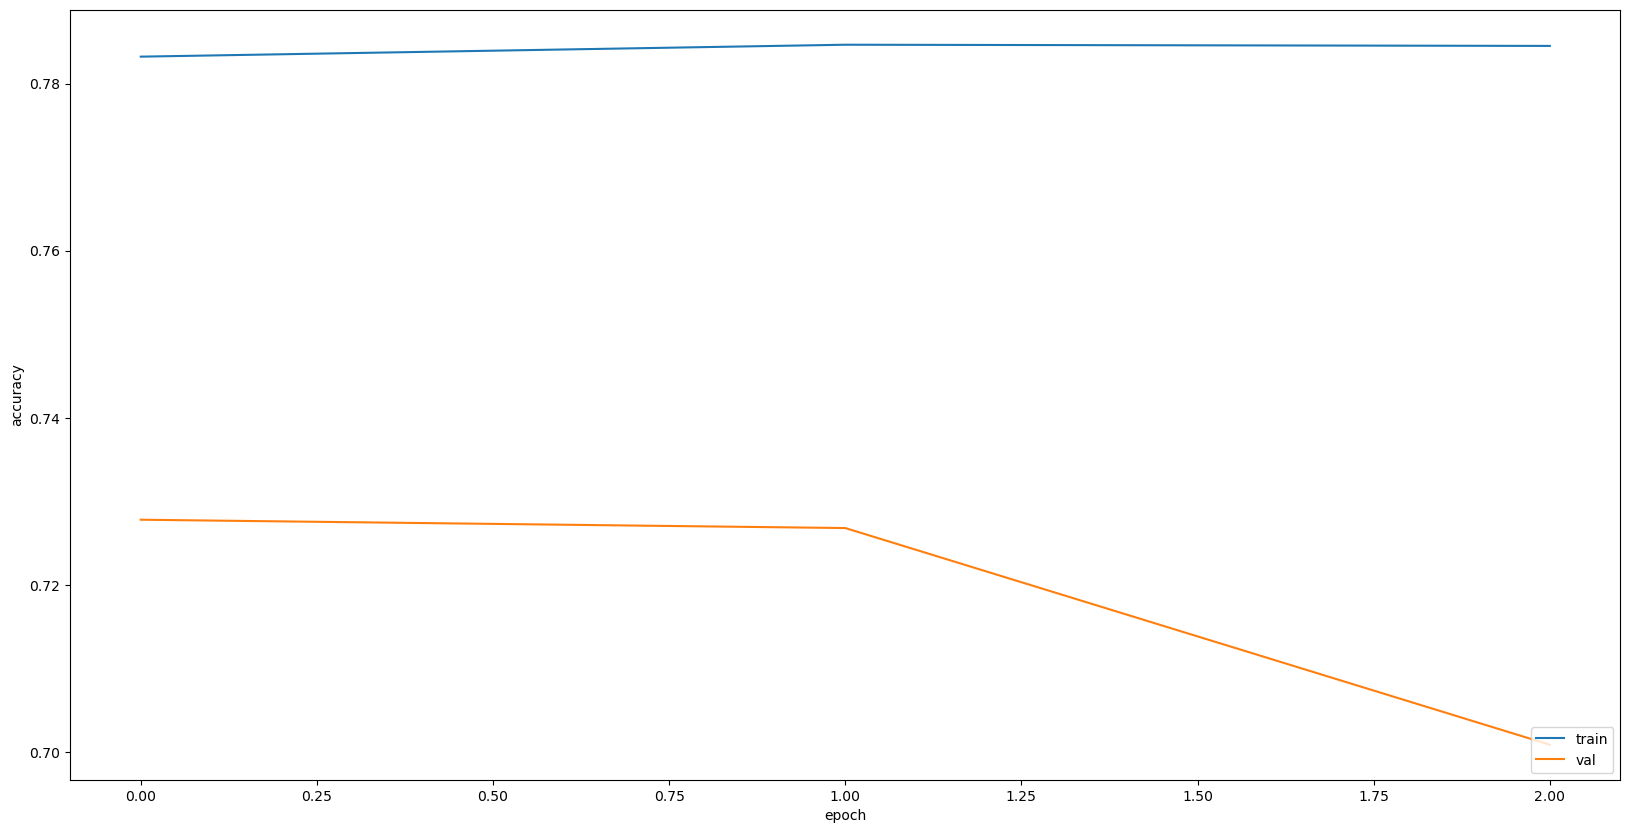

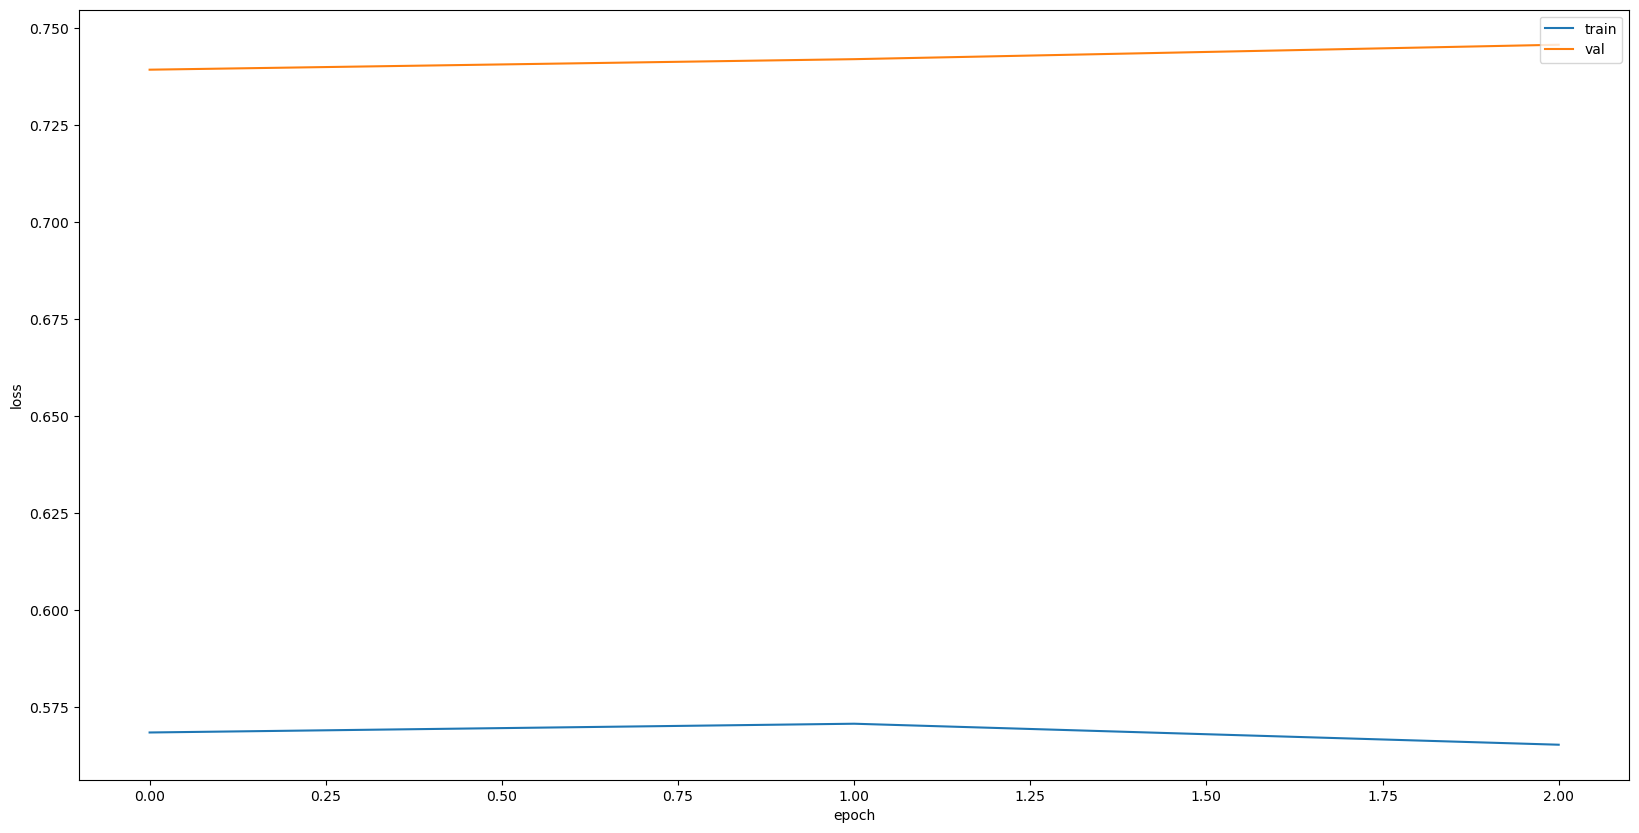

In [25]:
# Change 1, increase the batch size to 96
batch_size = 256

model_save = tf.keras.callbacks.ModelCheckpoint(filepath='best_model_doubled_batch.keras', monitor='val_accuracy', save_best_only=True)


history = model.fit(x=x_train,y=y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stop,model_save])

# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [26]:
# restore weights from the best training point from the previous training
model.load_weights('best_model_doubled_batch.keras')

scores = model.evaluate(x_train, y_train, verbose=0)
print('TRAINING SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

scores = model.evaluate(x_val, y_val, verbose=0)
print('\nVALIDATION SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

scores = model.evaluate(x_test, y_test, verbose=0)
print('\nTEST SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

TRAINING SET
Loss: 0.5660385489463806 
Accuracy: 0.7860710620880127

VALIDATION SET
Loss: 0.7339434027671814 
Accuracy: 0.7278165221214294

TEST SET
Loss: 0.7522120475769043 
Accuracy: 0.7281795740127563


In [27]:
# Still overfitting, change 2, add dropout layers
model_2 = tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 3)))
model_2.add(tf.keras.layers.MaxPool2D())
#model_2.add(tf.keras.layers.Conv2D(filters=100, kernel_size=(5, 5), activation='relu'))
#model_2.add(tf.keras.layers.MaxPool2D())
model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dense(units=1024, activation='relu'))
model_2.add(tf.keras.layers.Dense(units=512, activation='relu'))
model_2.add(tf.keras.layers.Dense(units=256, activation='relu'))
#model_2.add(tf.keras.layers.Dense(units=84, activation='relu'))
model_2.add(tf.keras.layers.Dense(units=7, activation = 'softmax'))

print(model_2.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 512)    │        38,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │    75,498,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,195,335 (290.66 MB)

 Trainable params: 76,195,335 (290.66 MB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6711 - loss: 1.4512 - val_accuracy: 0.6690 - val_loss: 1.0999
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6735 - loss: 1.0658 - val_accuracy: 0.6690 - val_loss: 1.0091
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6790 - loss: 0.9679 - val_accuracy: 0.6690 - val_loss: 0.9629
Epoch 3: early stopping


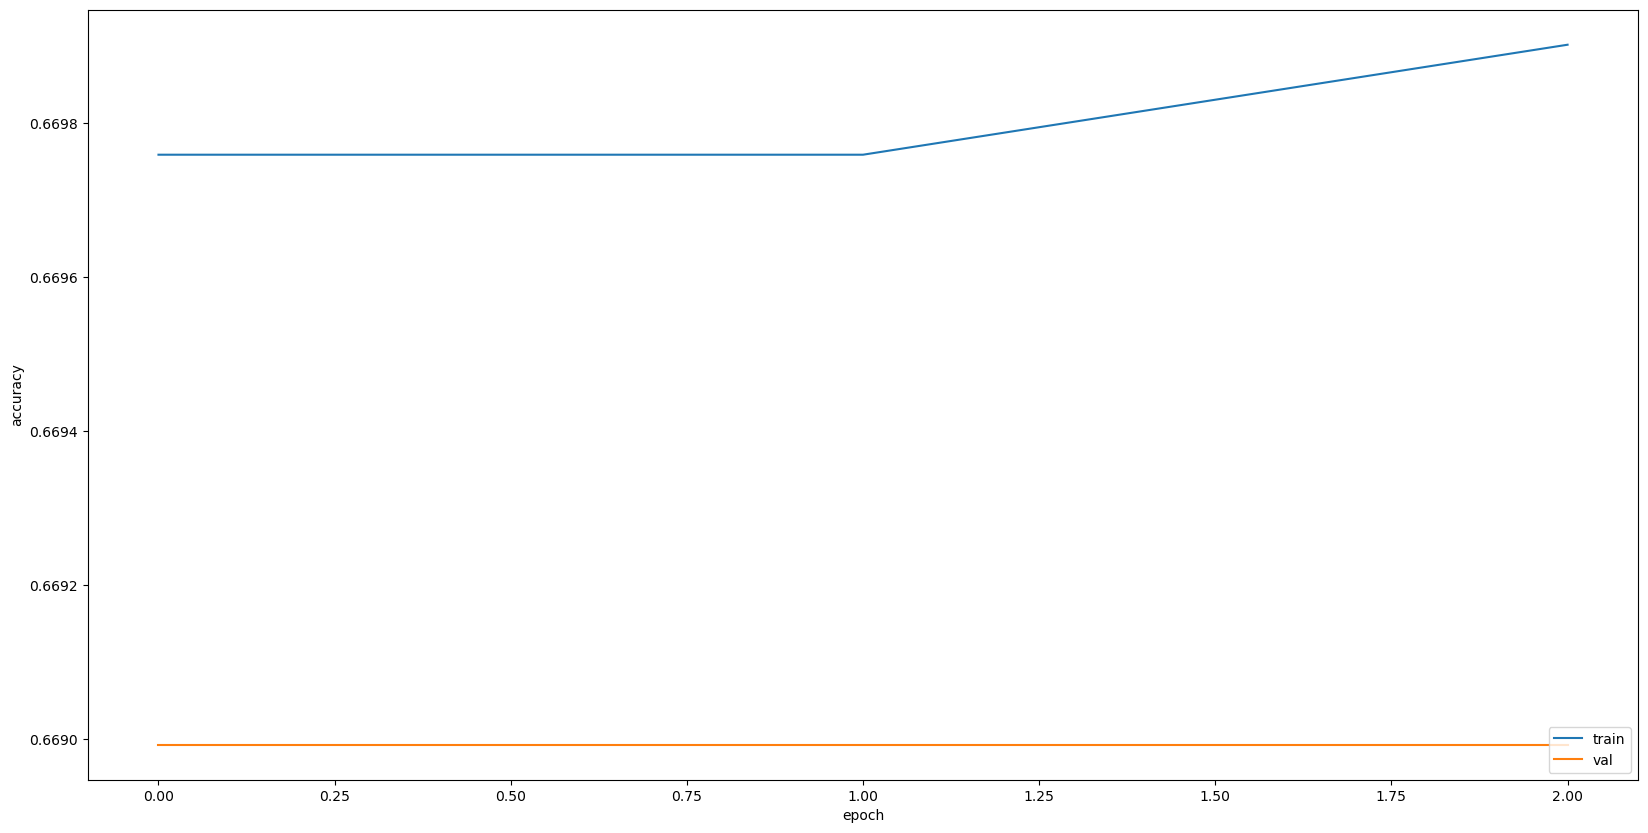

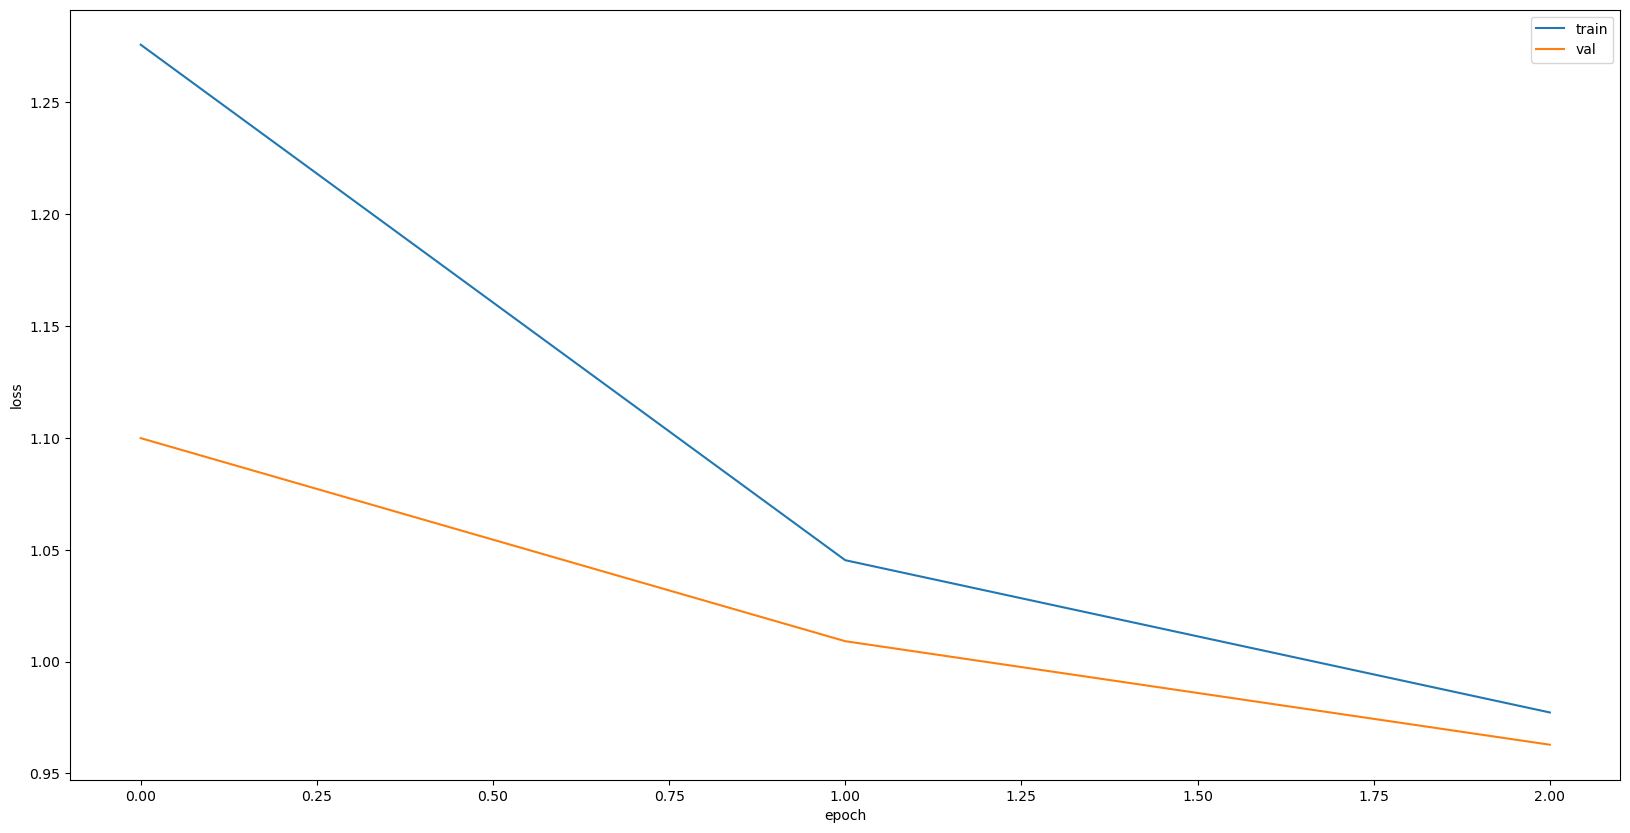

In [29]:
learning_rate = 0.001 
loss_function = 'sparse_categorical_crossentropy' 
batch_size = 256
num_epochs = 50 

optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)


model_2.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

model_save = tf.keras.callbacks.ModelCheckpoint(filepath='best_model_dropout.keras', monitor='val_accuracy', save_best_only=True)

#train
history = model_2.fit(x=x_train,y=y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[model_save, early_stop])

plt.rcParams["figure.figsize"] = (20,10)

# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
# Drop out layers